In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import numpy as np

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

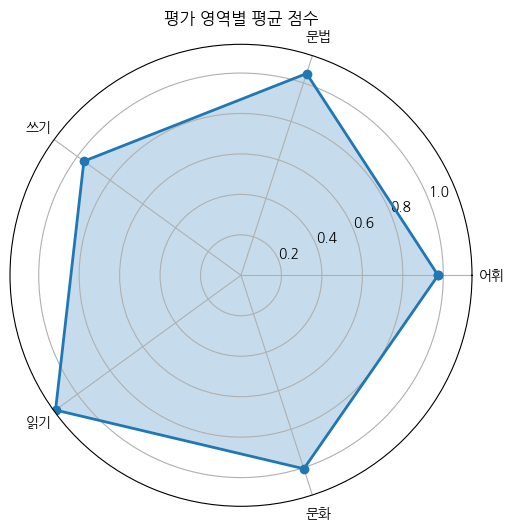

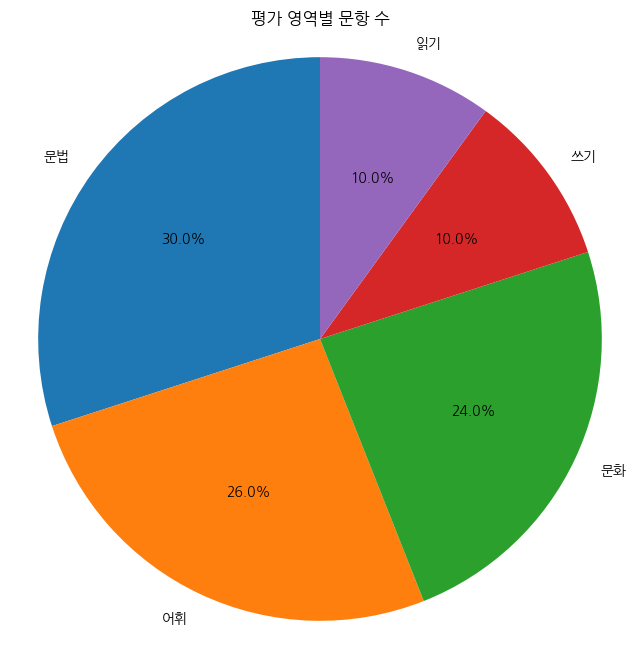

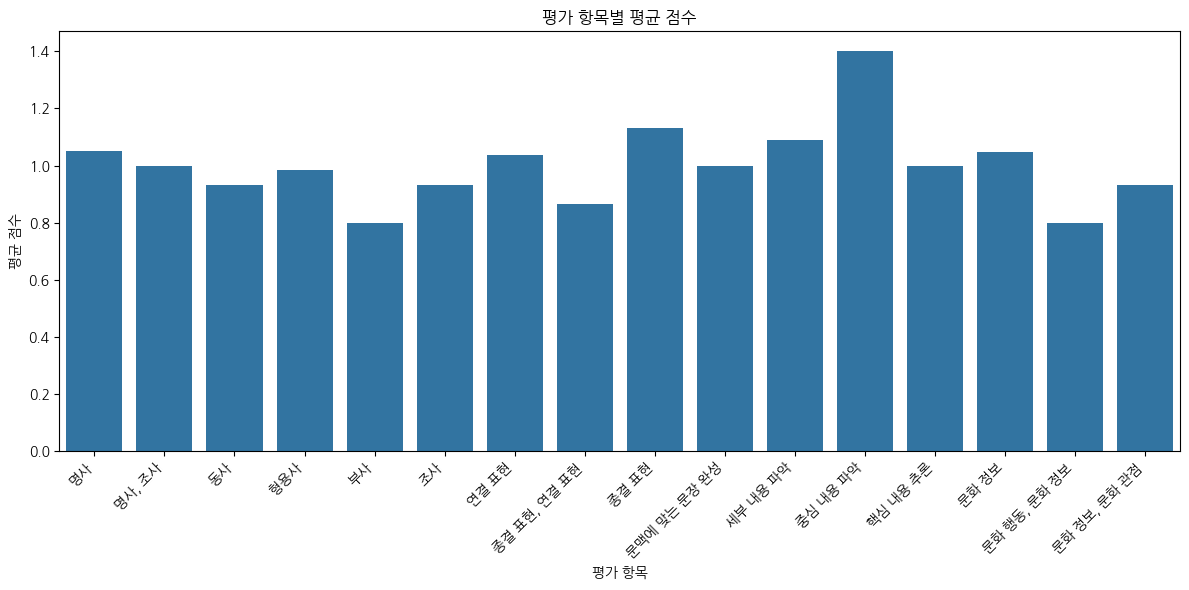

평가 영역별 평균 점수:
어휘: 0.97
문법: 1.05
쓰기: 0.96
읽기: 1.13
문화: 1.01

평가 항목별 평균 점수:
명사: 1.05
명사, 조사: 1.00
동사: 0.93
형용사: 0.98
부사: 0.80
조사: 0.93
연결 표현: 1.04
종결 표현, 연결 표현: 0.87
종결 표현: 1.13
문맥에 맞는 문장 완성: 1.00
세부 내용 파악: 1.09
중심 내용 파악: 1.40
핵심 내용 추론: 1.00
문화 정보: 1.05
문화 행동, 문화 정보: 0.80
문화 정보, 문화 관점: 0.93


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df_questions = pd.read_csv('../exam1.csv')
# 수험자응답정보
df_responses = pd.read_csv('../응답_데이터.csv')
# 문항IRT 분석정보
df_irt = pd.read_csv('../문항_매개변수.csv')
# 수험자 능력정보
df_ability = pd.read_csv('../수험생_능력_추정치.csv')

# 1. 평가 영역별 평균 점수 레이더 차트

# OX리스트를 이용하여 각 문항의 점수 계산
def calculate_scores(ox_string):
    return [2 if x == 'O' else 0 for x in ox_string]  # 각 문항은 2점

scores = df_responses['OX리스트'].apply(calculate_scores)
scores_df = pd.DataFrame(scores.tolist(), columns=df_questions['문제번호'])

# 평가 영역별 평균 점수 계산
area_scores = {}
for area in df_questions['평가영역'].unique():
    area_questions = df_questions[df_questions['평가영역'] == area]['문제번호']
    area_scores[area] = scores_df[area_questions].mean().mean()

# 레이더 차트 그리기
areas = list(area_scores.keys())
scores = list(area_scores.values())

angles = np.linspace(0, 2*np.pi, len(areas), endpoint=False)
scores = np.concatenate((scores, [scores[0]]))  # 첫 점을 마지막에 추가하여 폐곡선 만들기
angles = np.concatenate((angles, [angles[0]]))  # 첫 각도를 마지막에 추가

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='polar'))
ax.plot(angles, scores, 'o-', linewidth=2)
ax.fill(angles, scores, alpha=0.25)
ax.set_thetagrids(angles[:-1] * 180/np.pi, areas)
ax.set_title('평가 영역별 평균 점수')
ax.grid(True)
plt.show()

# 2. 평가 영역별 문항 수 파이 차트

area_counts = df_questions['평가영역'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('평가 영역별 문항 수')
plt.axis('equal')
plt.show()

# 3. 평가 항목별 평균 점수 막대 그래프

# 평가 항목별 평균 점수 계산
item_scores = {}
for item in df_questions['평가항목'].unique():
    item_questions = df_questions[df_questions['평가항목'] == item]['문제번호']
    item_scores[item] = scores_df[item_questions].mean().mean()

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x=list(item_scores.keys()), y=list(item_scores.values()))
plt.title('평가 항목별 평균 점수')
plt.xlabel('평가 항목')
plt.ylabel('평균 점수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 평가 영역과 항목별 평균 점수 출력
print("평가 영역별 평균 점수:")
for area, score in area_scores.items():
    print(f"{area}: {score:.2f}")

print("\n평가 항목별 평균 점수:")
for item, score in item_scores.items():
    print(f"{item}: {score:.2f}")